In [1]:
import numpy as np
import numpy.random as npr
import ssm as ssm
import matplotlib.pyplot as plt
import scipy

from simulate import *
from moment_conversion import *
from ssid import *

### Figure 3a

In [ ]:
# Simulate data
q = 5 # dimension of the data
p = 2  # dimension of the state space
k = 5 # Hankel parameter
m = 3 # inputs

# Load pre-simulated data
data_dict = np.load('em-inits/datasetD/best-lds.npz',allow_pickle=True)
z = data_dict['z']
y = data_dict['y']
u = data_dict['u']

*Random initializations*

In [ ]:
data = y.astype(int)

num_inits = 3
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):
    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")
    
    for j in range(num_iters):
        print(i, j)
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]

        except:
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD/random.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)
    

*driven BEST-LDS initializations*

In [ ]:
bern_params = np.load('em-inits/datasetD/best-lds.npz')

# set parameters
A = bern_params['Ahat']
B = bern_params['Bhat']
C = bern_params['Chat']
D = bern_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/em-fits/datasetD/best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Undriven BEST-LDS intializations*

In [ ]:
bern_params = np.load('em-inits/datasetD/undriven-best-lds.npz')

# set parameters
A = bern_params['Ahat']
C = bern_params['Chat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD/undriven-best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Gaussian*

In [ ]:
gauss_params = np.load('em-inits/datasetD/gaussian.npz')

# set parameters
A = gauss_params['Ahat']
B = gauss_params['Bhat']
C = gauss_params['Chat']
D = gauss_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD/gaussian.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

### Figure 3b

In [ ]:
# Simulate data
q = 5 # dimension of the data
p = 2  # dimension of the state space
k = 5 # Hankel parameter
m = 3 # inputs

# Load pre-simulated data
data_dict = np.load('em-inits/datasetD_small/best-lds.npz',allow_pickle=True)
z = data_dict['z']
y = data_dict['y']
u = data_dict['u']

*Random initializations*

In [ ]:
data = y.astype(int)

num_inits = 20
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):
    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")
    
    for j in range(num_iters):
        print(i, j)
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]

        except:
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD_small/random.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*driven BEST-LDS initializations*

In [ ]:
bern_params = np.load('em-inits/datasetD_small/best-lds.npz')

# set parameters
A = bern_params['Ahat']
B = bern_params['Bhat']
C = bern_params['Chat']
D = bern_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD_small/best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Undriven BEST-LDS intializations*

In [ ]:
bern_params = np.load('em-inits/datasetD_small/undriven-best-lds.npz')

# set parameters
A = bern_params['Ahat']
C = bern_params['Chat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD_small/undriven-best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Gaussian*

In [ ]:
gauss_params = np.load('em-inits/datasetD_small/gaussian.npz')

# set parameters
A = gauss_params['Ahat']
B = gauss_params['Bhat']
C = gauss_params['Chat']
D = gauss_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetD_small/gaussian.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

### Figure 3c

In [ ]:
# Simulate data
q = 5 # dimension of the data
p = 3  # dimension of the state space
k = 10 # Hankel parameter
m = 3 # inputs

# Load pre-simulated data
data_dict = np.load('em-inits/datasetE/best-lds.npz',allow_pickle=True)
z = data_dict['z']
y = data_dict['y']
u = data_dict['u']

*Random initializations*

In [ ]:
data = y.astype(int)

num_inits = 20
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):
    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")
    
    for j in range(num_iters):
        print(i, j)
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]

        except:
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetE/random.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*driven BEST-LDS initializations*

In [ ]:
bern_params = np.load('em-inits/datasetE/best-lds.npz')

# set parameters
A = bern_params['Ahat']
B = bern_params['Bhat']
C = bern_params['Chat']
D = bern_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetE/best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Undriven BEST-LDS intializations*

In [ ]:
bern_params = np.load('em-inits/datasetE/undriven-best-lds.npz')

# set parameters
A = bern_params['Ahat']
C = bern_params['Chat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetE/undriven-best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Gaussian*

In [ ]:
gauss_params = np.load('em-inits/datasetE/gaussian.npz')

# set parameters
A = gauss_params['Ahat']
B = gauss_params['Bhat']
C = gauss_params['Chat']
D = gauss_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetE/gaussian.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

### Figure 3d

In [ ]:
# Simulate data
q = 5 # dimension of the data
p = 2  # dimension of the state space
k = 10 # Hankel parameter
m = 3 # inputs

# Load pre-simulated data
data_dict = np.load('em-inits/datasetF/best-lds.npz',allow_pickle=True)
z = data_dict['z']
y = data_dict['y']
u = data_dict['u']

*Random initializations*

In [ ]:
data = y.astype(int)

num_inits = 20
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):
    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")
    
    for j in range(num_iters):
        print(i, j)
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]

        except:
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetF/random.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*driven BEST-LDS initializations*

In [ ]:
bern_params = np.load('em-inits/datasetF/best-lds.npz',allow_pickle=True)

# set parameters
A = bern_params['Ahat']
B = bern_params['Bhat']
C = bern_params['Chat']
D = bern_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetF/best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Undriven BEST-LDS intializations*

In [ ]:
bern_params = np.load('em-inits/datasetF/undriven-best-lds.npz',allow_pickle=True)

# set parameters
A = bern_params['Ahat']
C = bern_params['Chat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetF/undriven-best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Gaussian*

In [ ]:
gauss_params = np.load('em-inits/datasetF/gaussian.npz',allow_pickle=True)

# set parameters
A = gauss_params['Ahat']
B = gauss_params['Bhat']
C = gauss_params['Chat']
D = gauss_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('em-fits/datasetF/gaussian.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

## Dataset F, normal inputs

In [ ]:
# Simulate data
q = 10 # dimension of the data
p = 5  # dimension of the state space
k = 5 # Hankel parameter
m = 3 # inputs

# Load pre-simulated data
data_dict = np.load('./data/em-inits/datasetF_normal/ds-best-lds-0.npz',allow_pickle=True)
z = data_dict['z']
y = data_dict['y']
u = data_dict['u']

*Random initializations*

In [ ]:
data = y.astype(int)

num_inits = 20
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):
    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")
    
    for j in range(num_iters):
        print(i, j)
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]

        except:
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('./data/em-fits/datasetF_normal/ds0-random.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Driven best-LDS initializations*

In [ ]:
bern_params = np.load('./data/em-inits/datasetF_normal/ds-best-lds-0.npz',allow_pickle=True)

# set parameters
A = bern_params['Ahat']
B = bern_params['Bhat']
C = bern_params['Chat']
D = bern_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:
            print('break')
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('./data/em-fits/datasetF_normal/ds0-best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

*Gaussian initialization*

In [ ]:
gauss_params = np.load('./data/em-inits/datasetF_normal/ds0-gaussian-lds.npz',allow_pickle=True)

# set parameters
A = gauss_params['Ahat']
B = gauss_params['Bhat']
C = gauss_params['Chat']
D = gauss_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    np.savez('./data/em-fits/datasetF_normal/ds0-gaussian.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

In [ ]:
d = np.load('./data/em-fits/datasetF_normal/ds0-random.npz', allow_pickle=True)
rand_elbos = d['elbos']
d = np.load('./data/em-fits/datasetF_normal/ds0-gaussian.npz', allow_pickle=True)
gauss_elbos = d['elbos']
d = np.load('./data/em-fits/datasetF_normal/ds0-best-lds.npz', allow_pickle=True)
best_elbos = d['elbos']
plt.figure()
plt.plot(best_elbos[0, 1:], color='r', label='bestLDS')
plt.plot(gauss_elbos[0, 1:], color='b', label='gaussian')
plt.plot(rand_elbos[0, 1:], color='k', alpha=0.1, label='random')
for i in range(1, 20):
    plt.plot(rand_elbos[i, 1:], color='k', alpha=0.1)

plt.legend()

In [ ]:
from fit_EM import check_convergence

colors = np.array([[95,59,151],[85,180,103],[250,186,63],[150,150,150]])/255

dataset = 'datasetF_normal'
tol = 0.5
min_steps = 2

random_inits = np.load('./data/em-fits/%s/ds0-random.npz' %dataset)
random_elbos, random_steps = check_convergence(random_inits,tol=tol,method='Gain',min_steps=min_steps)

bern_init = np.load('./data/em-fits/%s/ds0-best-lds.npz' %dataset)
bern_elbos, bern_steps = check_convergence(bern_init,tol=tol,method='Gain',min_steps=min_steps)

gauss_init = np.load('./data/em-fits/%s/ds0-gaussian.npz' %dataset)
gauss_elbos, gauss_steps = check_convergence(gauss_init,tol=tol,method='Gain',min_steps=min_steps)

In [ ]:
colors = np.array([[95,59,151],[85,180,103],[250,186,63],[150,150,150]])/255

plt.figure(figsize=(7,4))

for i in range(20):
    if i == 0:
        plt.plot(random_elbos[i,0:int(random_steps[i])+1],color=colors[3], alpha=0.7, label='random')
    else:
        plt.plot(random_elbos[i,0:int(random_steps[i])+1],color=colors[3], alpha=0.7)
    
plt.plot(bern_elbos[0,0:int(bern_steps)+1],color=colors[0], label='best-LDS', linewidth=3)
plt.plot(gauss_elbos[0,0:int(gauss_steps)+1],color=colors[2], label='gaussian', linewidth=3)

plt.xlim([-5,59])
plt.xticks(np.arange(10,60,15))
# plt.ylim([-500000,100000])
# plt.yticks(np.arange(-500000,100001,200000))
plt.xlabel('EM steps')
plt.ylabel('ELBO')
plt.title('dataset F, normal', fontsize=24)
plt.legend()

# plt.savefig("saved_images/fig3_datasetC_large.pdf",transparent=True)

## Dataset E, nonnormal

In [6]:
# Run all
for ds in range(4,5):
    q = 5  # dimension of the data
    p = 2  # dimension of the state space
    k = p  # Hankel parameter
    m = 3  # dimension of the inputs

    # Load pre-simulated data
    data_dict = np.load('./data/em-inits/datasetE_nonnormal/best-lds-%d.npz' % ds,allow_pickle=True)
    z = data_dict['z']
    y = data_dict['y']
    u = data_dict['u']
    
    bern_params = np.load('./data/em-inits/datasetE_nonnormal/best-lds-%d.npz' % ds,allow_pickle=True)

    # set parameters
    A = bern_params['Ahat']
    B = bern_params['Bhat']
    C = bern_params['Chat']
    D = bern_params['Dhat']

    data = y.astype(int)

    num_inits = 1
    num_iters = 50
    elbos = np.zeros((num_inits,num_iters * 2))
    LDS = np.empty(num_inits, dtype=object)

    As = np.zeros((num_inits,num_iters,p,p))
    Bs = np.zeros((num_inits,num_iters,p,m))
    Cs = np.zeros((num_inits,num_iters,q,p))
    Ds = np.zeros((num_inits,num_iters,q,m))

    for i in range(num_inits):

        lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

        lds.dynamics.As[0] = A
        lds.dynamics.Vs[0] = B
        lds.emissions.Cs[0] = C
        lds.emissions.Fs[0] = D

        for j in range(num_iters):

            try:
                inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
                elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
            except:
                print('break')
                lds = None
                break

            As[i,j,:,:] = lds.dynamics.As[0]
            Bs[i,j,:,:] = lds.dynamics.Vs[0]
            Cs[i,j,:,:] = lds.emissions.Cs[0]
            Ds[i,j,:,:] = lds.emissions.Fs[0]

        LDS[i] = lds

        np.savez('./data/em-fits/datasetE_nonnormal/ds%d-best-lds.npz' % ds, y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

break


In [2]:
# Simulate data
q = 5  # dimension of the data
p = 2  # dimension of the state space
k = p  # Hankel parameter
m = 3  # dimension of the inputs

# Load pre-simulated data
data_dict = np.load('./data/em-inits/datasetE_nonnormal/best-lds-3.npz',allow_pickle=True)
z = data_dict['z']
y = data_dict['y']
u = data_dict['u']

*best-LDS inits*

In [3]:
bern_params = np.load('./data/em-inits/datasetE_nonnormal/best-lds-3.npz',allow_pickle=True)

# set parameters
A = bern_params['Ahat']
B = bern_params['Bhat']
C = bern_params['Chat']
D = bern_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 50
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:
            print('break')
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    
    np.savez('./data/em-fits/datasetE_nonnormal/ds3-best-lds.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

/opt/anaconda3/envs/bestLDS/lib/python3.10/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

*random inits*

In [4]:
data = y.astype(int)

num_inits = 20
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):
    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")
    
    for j in range(num_iters):
        print(i, j)
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]

        except:
            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds

    np.savez('./data/em-fits/datasetE_nonnormal/ds3-random.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

0 0


  0%|          | 0/2 [00:00<?, ?it/s]

0 1


  0%|          | 0/2 [00:00<?, ?it/s]

0 2


  0%|          | 0/2 [00:00<?, ?it/s]

0 3


  0%|          | 0/2 [00:00<?, ?it/s]

0 4


  0%|          | 0/2 [00:00<?, ?it/s]

0 5


  0%|          | 0/2 [00:00<?, ?it/s]

0 6


  0%|          | 0/2 [00:00<?, ?it/s]

0 7


  0%|          | 0/2 [00:00<?, ?it/s]

0 8


  0%|          | 0/2 [00:00<?, ?it/s]

0 9


  0%|          | 0/2 [00:00<?, ?it/s]

0 10


  0%|          | 0/2 [00:00<?, ?it/s]

0 11


  0%|          | 0/2 [00:00<?, ?it/s]

0 12


  0%|          | 0/2 [00:00<?, ?it/s]

0 13


  0%|          | 0/2 [00:00<?, ?it/s]

0 14


  0%|          | 0/2 [00:00<?, ?it/s]

0 15


  0%|          | 0/2 [00:00<?, ?it/s]

0 16


  0%|          | 0/2 [00:00<?, ?it/s]

0 17


  0%|          | 0/2 [00:00<?, ?it/s]

0 18


  0%|          | 0/2 [00:00<?, ?it/s]

0 19


  0%|          | 0/2 [00:00<?, ?it/s]

0 20


  0%|          | 0/2 [00:00<?, ?it/s]

0 21


  0%|          | 0/2 [00:00<?, ?it/s]

0 22


  0%|          | 0/2 [00:00<?, ?it/s]

0 23


  0%|          | 0/2 [00:00<?, ?it/s]

0 24


  0%|          | 0/2 [00:00<?, ?it/s]

0 25


  0%|          | 0/2 [00:00<?, ?it/s]

0 26


  0%|          | 0/2 [00:00<?, ?it/s]

0 27


  0%|          | 0/2 [00:00<?, ?it/s]

0 28


  0%|          | 0/2 [00:00<?, ?it/s]

0 29


  0%|          | 0/2 [00:00<?, ?it/s]

1 0


  0%|          | 0/2 [00:00<?, ?it/s]

1 1


  0%|          | 0/2 [00:00<?, ?it/s]

1 2


  0%|          | 0/2 [00:00<?, ?it/s]

1 3


  0%|          | 0/2 [00:00<?, ?it/s]

1 4


  0%|          | 0/2 [00:00<?, ?it/s]

1 5


  0%|          | 0/2 [00:00<?, ?it/s]

1 6


  0%|          | 0/2 [00:00<?, ?it/s]

1 7


  0%|          | 0/2 [00:00<?, ?it/s]

1 8


  0%|          | 0/2 [00:00<?, ?it/s]

1 9


  0%|          | 0/2 [00:00<?, ?it/s]

1 10


  0%|          | 0/2 [00:00<?, ?it/s]

1 11


  0%|          | 0/2 [00:00<?, ?it/s]

1 12


  0%|          | 0/2 [00:00<?, ?it/s]

1 13


  0%|          | 0/2 [00:00<?, ?it/s]

1 14


  0%|          | 0/2 [00:00<?, ?it/s]

1 15


  0%|          | 0/2 [00:00<?, ?it/s]

1 16


  0%|          | 0/2 [00:00<?, ?it/s]

1 17


  0%|          | 0/2 [00:00<?, ?it/s]

1 18


  0%|          | 0/2 [00:00<?, ?it/s]

1 19


  0%|          | 0/2 [00:00<?, ?it/s]

1 20


  0%|          | 0/2 [00:00<?, ?it/s]

1 21


  0%|          | 0/2 [00:00<?, ?it/s]

1 22


  0%|          | 0/2 [00:00<?, ?it/s]

1 23


  0%|          | 0/2 [00:00<?, ?it/s]

1 24


  0%|          | 0/2 [00:00<?, ?it/s]

1 25


  0%|          | 0/2 [00:00<?, ?it/s]

1 26


  0%|          | 0/2 [00:00<?, ?it/s]

1 27


  0%|          | 0/2 [00:00<?, ?it/s]

1 28


  0%|          | 0/2 [00:00<?, ?it/s]

1 29


  0%|          | 0/2 [00:00<?, ?it/s]

2 0


  0%|          | 0/2 [00:00<?, ?it/s]

2 1


  0%|          | 0/2 [00:00<?, ?it/s]

2 2


  0%|          | 0/2 [00:00<?, ?it/s]

2 3


  0%|          | 0/2 [00:00<?, ?it/s]

2 4


  0%|          | 0/2 [00:00<?, ?it/s]

2 5


  0%|          | 0/2 [00:00<?, ?it/s]

2 6


  0%|          | 0/2 [00:00<?, ?it/s]

2 7


  0%|          | 0/2 [00:00<?, ?it/s]

2 8


  0%|          | 0/2 [00:00<?, ?it/s]

2 9


  0%|          | 0/2 [00:00<?, ?it/s]

2 10


  0%|          | 0/2 [00:00<?, ?it/s]

2 11


  0%|          | 0/2 [00:00<?, ?it/s]

2 12


  0%|          | 0/2 [00:00<?, ?it/s]

2 13


  0%|          | 0/2 [00:00<?, ?it/s]

2 14


  0%|          | 0/2 [00:00<?, ?it/s]

2 15


  0%|          | 0/2 [00:00<?, ?it/s]

2 16


  0%|          | 0/2 [00:00<?, ?it/s]

2 17


  0%|          | 0/2 [00:00<?, ?it/s]

2 18


  0%|          | 0/2 [00:00<?, ?it/s]

2 19


  0%|          | 0/2 [00:00<?, ?it/s]

2 20


  0%|          | 0/2 [00:00<?, ?it/s]

2 21


  0%|          | 0/2 [00:00<?, ?it/s]

2 22


  0%|          | 0/2 [00:00<?, ?it/s]

2 23


  0%|          | 0/2 [00:00<?, ?it/s]

2 24


  0%|          | 0/2 [00:00<?, ?it/s]

2 25


  0%|          | 0/2 [00:00<?, ?it/s]

2 26


  0%|          | 0/2 [00:00<?, ?it/s]

2 27


  0%|          | 0/2 [00:00<?, ?it/s]

2 28


  0%|          | 0/2 [00:00<?, ?it/s]

2 29


  0%|          | 0/2 [00:00<?, ?it/s]

3 0


  0%|          | 0/2 [00:00<?, ?it/s]

3 1


  0%|          | 0/2 [00:00<?, ?it/s]

3 2


  0%|          | 0/2 [00:00<?, ?it/s]

3 3


  0%|          | 0/2 [00:00<?, ?it/s]

3 4


  0%|          | 0/2 [00:00<?, ?it/s]

3 5


  0%|          | 0/2 [00:00<?, ?it/s]

3 6


  0%|          | 0/2 [00:00<?, ?it/s]

3 7


  0%|          | 0/2 [00:00<?, ?it/s]

3 8


  0%|          | 0/2 [00:00<?, ?it/s]

3 9


  0%|          | 0/2 [00:00<?, ?it/s]

3 10


  0%|          | 0/2 [00:00<?, ?it/s]

3 11


  0%|          | 0/2 [00:00<?, ?it/s]

3 12


  0%|          | 0/2 [00:00<?, ?it/s]

3 13


  0%|          | 0/2 [00:00<?, ?it/s]

3 14


  0%|          | 0/2 [00:00<?, ?it/s]

3 15


  0%|          | 0/2 [00:00<?, ?it/s]

3 16


  0%|          | 0/2 [00:00<?, ?it/s]

3 17


  0%|          | 0/2 [00:00<?, ?it/s]

3 18


  0%|          | 0/2 [00:00<?, ?it/s]

3 19


  0%|          | 0/2 [00:00<?, ?it/s]

3 20


  0%|          | 0/2 [00:00<?, ?it/s]

3 21


  0%|          | 0/2 [00:00<?, ?it/s]

3 22


  0%|          | 0/2 [00:00<?, ?it/s]

3 23


  0%|          | 0/2 [00:00<?, ?it/s]

3 24


  0%|          | 0/2 [00:00<?, ?it/s]

3 25


  0%|          | 0/2 [00:00<?, ?it/s]

3 26


  0%|          | 0/2 [00:00<?, ?it/s]

3 27


  0%|          | 0/2 [00:00<?, ?it/s]

3 28


  0%|          | 0/2 [00:00<?, ?it/s]

3 29


  0%|          | 0/2 [00:00<?, ?it/s]

4 0


  0%|          | 0/2 [00:00<?, ?it/s]

4 1


  0%|          | 0/2 [00:00<?, ?it/s]

4 2


  0%|          | 0/2 [00:00<?, ?it/s]

4 3


  0%|          | 0/2 [00:00<?, ?it/s]

4 4


  0%|          | 0/2 [00:00<?, ?it/s]

4 5


  0%|          | 0/2 [00:00<?, ?it/s]

4 6


  0%|          | 0/2 [00:00<?, ?it/s]

4 7


  0%|          | 0/2 [00:00<?, ?it/s]

4 8


  0%|          | 0/2 [00:00<?, ?it/s]

4 9


  0%|          | 0/2 [00:00<?, ?it/s]

4 10


  0%|          | 0/2 [00:00<?, ?it/s]

4 11


  0%|          | 0/2 [00:00<?, ?it/s]

4 12


  0%|          | 0/2 [00:00<?, ?it/s]

4 13


  0%|          | 0/2 [00:00<?, ?it/s]

4 14


  0%|          | 0/2 [00:00<?, ?it/s]

4 15


  0%|          | 0/2 [00:00<?, ?it/s]

4 16


  0%|          | 0/2 [00:00<?, ?it/s]

4 17


  0%|          | 0/2 [00:00<?, ?it/s]

4 18


  0%|          | 0/2 [00:00<?, ?it/s]

4 19


  0%|          | 0/2 [00:00<?, ?it/s]

4 20


  0%|          | 0/2 [00:00<?, ?it/s]

4 21


  0%|          | 0/2 [00:00<?, ?it/s]

4 22


  0%|          | 0/2 [00:00<?, ?it/s]

4 23


  0%|          | 0/2 [00:00<?, ?it/s]

4 24


  0%|          | 0/2 [00:00<?, ?it/s]

4 25


  0%|          | 0/2 [00:00<?, ?it/s]

4 26


  0%|          | 0/2 [00:00<?, ?it/s]

4 27


  0%|          | 0/2 [00:00<?, ?it/s]

4 28


  0%|          | 0/2 [00:00<?, ?it/s]

4 29


  0%|          | 0/2 [00:00<?, ?it/s]

5 0


  0%|          | 0/2 [00:00<?, ?it/s]

5 1


  0%|          | 0/2 [00:00<?, ?it/s]

5 2


  0%|          | 0/2 [00:00<?, ?it/s]

5 3


  0%|          | 0/2 [00:00<?, ?it/s]

5 4


  0%|          | 0/2 [00:00<?, ?it/s]

5 5


  0%|          | 0/2 [00:00<?, ?it/s]

5 6


  0%|          | 0/2 [00:00<?, ?it/s]

5 7


  0%|          | 0/2 [00:00<?, ?it/s]

5 8


  0%|          | 0/2 [00:00<?, ?it/s]

5 9


  0%|          | 0/2 [00:00<?, ?it/s]

5 10


  0%|          | 0/2 [00:00<?, ?it/s]

5 11


  0%|          | 0/2 [00:00<?, ?it/s]

5 12


  0%|          | 0/2 [00:00<?, ?it/s]

5 13


  0%|          | 0/2 [00:00<?, ?it/s]

5 14


  0%|          | 0/2 [00:00<?, ?it/s]

5 15


  0%|          | 0/2 [00:00<?, ?it/s]

5 16


  0%|          | 0/2 [00:00<?, ?it/s]

5 17


  0%|          | 0/2 [00:00<?, ?it/s]

5 18


  0%|          | 0/2 [00:00<?, ?it/s]

5 19


  0%|          | 0/2 [00:00<?, ?it/s]

5 20


  0%|          | 0/2 [00:00<?, ?it/s]

5 21


  0%|          | 0/2 [00:00<?, ?it/s]

5 22


  0%|          | 0/2 [00:00<?, ?it/s]

5 23


  0%|          | 0/2 [00:00<?, ?it/s]

5 24


  0%|          | 0/2 [00:00<?, ?it/s]

5 25


  0%|          | 0/2 [00:00<?, ?it/s]

5 26


  0%|          | 0/2 [00:00<?, ?it/s]

5 27


  0%|          | 0/2 [00:00<?, ?it/s]

5 28


  0%|          | 0/2 [00:00<?, ?it/s]

5 29


  0%|          | 0/2 [00:00<?, ?it/s]

6 0


  0%|          | 0/2 [00:00<?, ?it/s]

6 1


  0%|          | 0/2 [00:00<?, ?it/s]

6 2


  0%|          | 0/2 [00:00<?, ?it/s]

6 3


  0%|          | 0/2 [00:00<?, ?it/s]

6 4


  0%|          | 0/2 [00:00<?, ?it/s]

6 5


  0%|          | 0/2 [00:00<?, ?it/s]

6 6


  0%|          | 0/2 [00:00<?, ?it/s]

6 7


  0%|          | 0/2 [00:00<?, ?it/s]

6 8


  0%|          | 0/2 [00:00<?, ?it/s]

6 9


  0%|          | 0/2 [00:00<?, ?it/s]

6 10


  0%|          | 0/2 [00:00<?, ?it/s]

6 11


  0%|          | 0/2 [00:00<?, ?it/s]

6 12


  0%|          | 0/2 [00:00<?, ?it/s]

6 13


  0%|          | 0/2 [00:00<?, ?it/s]

6 14


  0%|          | 0/2 [00:00<?, ?it/s]

6 15


  0%|          | 0/2 [00:00<?, ?it/s]

6 16


  0%|          | 0/2 [00:00<?, ?it/s]

6 17


  0%|          | 0/2 [00:00<?, ?it/s]

6 18


  0%|          | 0/2 [00:00<?, ?it/s]

6 19


  0%|          | 0/2 [00:00<?, ?it/s]

6 20


  0%|          | 0/2 [00:00<?, ?it/s]

6 21


  0%|          | 0/2 [00:00<?, ?it/s]

6 22


  0%|          | 0/2 [00:00<?, ?it/s]

6 23


  0%|          | 0/2 [00:00<?, ?it/s]

6 24


  0%|          | 0/2 [00:00<?, ?it/s]

6 25


  0%|          | 0/2 [00:00<?, ?it/s]

6 26


  0%|          | 0/2 [00:00<?, ?it/s]

6 27


  0%|          | 0/2 [00:00<?, ?it/s]

6 28


  0%|          | 0/2 [00:00<?, ?it/s]

6 29


  0%|          | 0/2 [00:00<?, ?it/s]

7 0


  0%|          | 0/2 [00:00<?, ?it/s]

7 1


  0%|          | 0/2 [00:00<?, ?it/s]

7 2


  0%|          | 0/2 [00:00<?, ?it/s]

7 3


  0%|          | 0/2 [00:00<?, ?it/s]

7 4


  0%|          | 0/2 [00:00<?, ?it/s]

7 5


  0%|          | 0/2 [00:00<?, ?it/s]

7 6


  0%|          | 0/2 [00:00<?, ?it/s]

7 7


  0%|          | 0/2 [00:00<?, ?it/s]

7 8


  0%|          | 0/2 [00:00<?, ?it/s]

7 9


  0%|          | 0/2 [00:00<?, ?it/s]

7 10


  0%|          | 0/2 [00:00<?, ?it/s]

7 11


  0%|          | 0/2 [00:00<?, ?it/s]

7 12


  0%|          | 0/2 [00:00<?, ?it/s]

7 13


  0%|          | 0/2 [00:00<?, ?it/s]

7 14


  0%|          | 0/2 [00:00<?, ?it/s]

7 15


  0%|          | 0/2 [00:00<?, ?it/s]

7 16


  0%|          | 0/2 [00:00<?, ?it/s]

7 17


  0%|          | 0/2 [00:00<?, ?it/s]

7 18


  0%|          | 0/2 [00:00<?, ?it/s]

7 19


  0%|          | 0/2 [00:00<?, ?it/s]

7 20


  0%|          | 0/2 [00:00<?, ?it/s]

7 21


  0%|          | 0/2 [00:00<?, ?it/s]

7 22


  0%|          | 0/2 [00:00<?, ?it/s]

7 23


  0%|          | 0/2 [00:00<?, ?it/s]

7 24


  0%|          | 0/2 [00:00<?, ?it/s]

7 25


  0%|          | 0/2 [00:00<?, ?it/s]

7 26


  0%|          | 0/2 [00:00<?, ?it/s]

7 27


  0%|          | 0/2 [00:00<?, ?it/s]

7 28


  0%|          | 0/2 [00:00<?, ?it/s]

7 29


  0%|          | 0/2 [00:00<?, ?it/s]

8 0


  0%|          | 0/2 [00:00<?, ?it/s]

8 1


  0%|          | 0/2 [00:00<?, ?it/s]

8 2


  0%|          | 0/2 [00:00<?, ?it/s]

8 3


  0%|          | 0/2 [00:00<?, ?it/s]

8 4


  0%|          | 0/2 [00:00<?, ?it/s]

8 5


  0%|          | 0/2 [00:00<?, ?it/s]

8 6


  0%|          | 0/2 [00:00<?, ?it/s]

8 7


  0%|          | 0/2 [00:00<?, ?it/s]

8 8


  0%|          | 0/2 [00:00<?, ?it/s]

8 9


  0%|          | 0/2 [00:00<?, ?it/s]

8 10


  0%|          | 0/2 [00:00<?, ?it/s]

8 11


  0%|          | 0/2 [00:00<?, ?it/s]

8 12


  0%|          | 0/2 [00:00<?, ?it/s]

8 13


  0%|          | 0/2 [00:00<?, ?it/s]

8 14


  0%|          | 0/2 [00:00<?, ?it/s]

8 15


  0%|          | 0/2 [00:00<?, ?it/s]

8 16


  0%|          | 0/2 [00:00<?, ?it/s]

8 17


  0%|          | 0/2 [00:00<?, ?it/s]

8 18


  0%|          | 0/2 [00:00<?, ?it/s]

8 19


  0%|          | 0/2 [00:00<?, ?it/s]

8 20


  0%|          | 0/2 [00:00<?, ?it/s]

8 21


  0%|          | 0/2 [00:00<?, ?it/s]

8 22


  0%|          | 0/2 [00:00<?, ?it/s]

8 23


  0%|          | 0/2 [00:00<?, ?it/s]

8 24


  0%|          | 0/2 [00:00<?, ?it/s]

8 25


  0%|          | 0/2 [00:00<?, ?it/s]

8 26


  0%|          | 0/2 [00:00<?, ?it/s]

8 27


  0%|          | 0/2 [00:00<?, ?it/s]

8 28


  0%|          | 0/2 [00:00<?, ?it/s]

8 29


  0%|          | 0/2 [00:00<?, ?it/s]

9 0


  0%|          | 0/2 [00:00<?, ?it/s]

9 1


  0%|          | 0/2 [00:00<?, ?it/s]

9 2


  0%|          | 0/2 [00:00<?, ?it/s]

9 3


  0%|          | 0/2 [00:00<?, ?it/s]

9 4


  0%|          | 0/2 [00:00<?, ?it/s]

9 5


  0%|          | 0/2 [00:00<?, ?it/s]

9 6


  0%|          | 0/2 [00:00<?, ?it/s]

9 7


  0%|          | 0/2 [00:00<?, ?it/s]

9 8


  0%|          | 0/2 [00:00<?, ?it/s]

9 9


  0%|          | 0/2 [00:00<?, ?it/s]

9 10


  0%|          | 0/2 [00:00<?, ?it/s]

9 11


  0%|          | 0/2 [00:00<?, ?it/s]

9 12


  0%|          | 0/2 [00:00<?, ?it/s]

9 13


  0%|          | 0/2 [00:00<?, ?it/s]

9 14


  0%|          | 0/2 [00:00<?, ?it/s]

9 15


  0%|          | 0/2 [00:00<?, ?it/s]

9 16


  0%|          | 0/2 [00:00<?, ?it/s]

9 17


  0%|          | 0/2 [00:00<?, ?it/s]

9 18


  0%|          | 0/2 [00:00<?, ?it/s]

9 19


  0%|          | 0/2 [00:00<?, ?it/s]

9 20


  0%|          | 0/2 [00:00<?, ?it/s]

9 21


  0%|          | 0/2 [00:00<?, ?it/s]

9 22


  0%|          | 0/2 [00:00<?, ?it/s]

9 23


  0%|          | 0/2 [00:00<?, ?it/s]

9 24


  0%|          | 0/2 [00:00<?, ?it/s]

9 25


  0%|          | 0/2 [00:00<?, ?it/s]

9 26


  0%|          | 0/2 [00:00<?, ?it/s]

9 27


  0%|          | 0/2 [00:00<?, ?it/s]

9 28


  0%|          | 0/2 [00:00<?, ?it/s]

9 29


  0%|          | 0/2 [00:00<?, ?it/s]

10 0


  0%|          | 0/2 [00:00<?, ?it/s]

10 1


  0%|          | 0/2 [00:00<?, ?it/s]

10 2


  0%|          | 0/2 [00:00<?, ?it/s]

10 3


  0%|          | 0/2 [00:00<?, ?it/s]

10 4


  0%|          | 0/2 [00:00<?, ?it/s]

10 5


  0%|          | 0/2 [00:00<?, ?it/s]

10 6


  0%|          | 0/2 [00:00<?, ?it/s]

10 7


  0%|          | 0/2 [00:00<?, ?it/s]

10 8


  0%|          | 0/2 [00:00<?, ?it/s]

10 9


  0%|          | 0/2 [00:00<?, ?it/s]

10 10


  0%|          | 0/2 [00:00<?, ?it/s]

10 11


  0%|          | 0/2 [00:00<?, ?it/s]

10 12


  0%|          | 0/2 [00:00<?, ?it/s]

10 13


  0%|          | 0/2 [00:00<?, ?it/s]

10 14


  0%|          | 0/2 [00:00<?, ?it/s]

10 15


  0%|          | 0/2 [00:00<?, ?it/s]

10 16


  0%|          | 0/2 [00:00<?, ?it/s]

10 17


  0%|          | 0/2 [00:00<?, ?it/s]

10 18


  0%|          | 0/2 [00:00<?, ?it/s]

10 19


  0%|          | 0/2 [00:00<?, ?it/s]

10 20


  0%|          | 0/2 [00:00<?, ?it/s]

10 21


  0%|          | 0/2 [00:00<?, ?it/s]

10 22


  0%|          | 0/2 [00:00<?, ?it/s]

10 23


  0%|          | 0/2 [00:00<?, ?it/s]

10 24


  0%|          | 0/2 [00:00<?, ?it/s]

10 25


  0%|          | 0/2 [00:00<?, ?it/s]

10 26


  0%|          | 0/2 [00:00<?, ?it/s]

10 27


  0%|          | 0/2 [00:00<?, ?it/s]

10 28


  0%|          | 0/2 [00:00<?, ?it/s]

10 29


  0%|          | 0/2 [00:00<?, ?it/s]

11 0


  0%|          | 0/2 [00:00<?, ?it/s]

11 1


  0%|          | 0/2 [00:00<?, ?it/s]

11 2


  0%|          | 0/2 [00:00<?, ?it/s]

11 3


  0%|          | 0/2 [00:00<?, ?it/s]

11 4


  0%|          | 0/2 [00:00<?, ?it/s]

11 5


  0%|          | 0/2 [00:00<?, ?it/s]

11 6


  0%|          | 0/2 [00:00<?, ?it/s]

11 7


  0%|          | 0/2 [00:00<?, ?it/s]

11 8


  0%|          | 0/2 [00:00<?, ?it/s]

11 9


  0%|          | 0/2 [00:00<?, ?it/s]

11 10


  0%|          | 0/2 [00:00<?, ?it/s]

11 11


  0%|          | 0/2 [00:00<?, ?it/s]

11 12


  0%|          | 0/2 [00:00<?, ?it/s]

11 13


  0%|          | 0/2 [00:00<?, ?it/s]

11 14


  0%|          | 0/2 [00:00<?, ?it/s]

11 15


  0%|          | 0/2 [00:00<?, ?it/s]

11 16


  0%|          | 0/2 [00:00<?, ?it/s]

11 17


  0%|          | 0/2 [00:00<?, ?it/s]

11 18


  0%|          | 0/2 [00:00<?, ?it/s]

11 19


  0%|          | 0/2 [00:00<?, ?it/s]

11 20


  0%|          | 0/2 [00:00<?, ?it/s]

11 21


  0%|          | 0/2 [00:00<?, ?it/s]

11 22


  0%|          | 0/2 [00:00<?, ?it/s]

11 23


  0%|          | 0/2 [00:00<?, ?it/s]

11 24


  0%|          | 0/2 [00:00<?, ?it/s]

11 25


  0%|          | 0/2 [00:00<?, ?it/s]

11 26


  0%|          | 0/2 [00:00<?, ?it/s]

11 27


  0%|          | 0/2 [00:00<?, ?it/s]

11 28


  0%|          | 0/2 [00:00<?, ?it/s]

11 29


  0%|          | 0/2 [00:00<?, ?it/s]

12 0


  0%|          | 0/2 [00:00<?, ?it/s]

12 1


  0%|          | 0/2 [00:00<?, ?it/s]

12 2


  0%|          | 0/2 [00:00<?, ?it/s]

12 3


  0%|          | 0/2 [00:00<?, ?it/s]

12 4


  0%|          | 0/2 [00:00<?, ?it/s]

12 5


  0%|          | 0/2 [00:00<?, ?it/s]

12 6


  0%|          | 0/2 [00:00<?, ?it/s]

12 7


  0%|          | 0/2 [00:00<?, ?it/s]

12 8


  0%|          | 0/2 [00:00<?, ?it/s]

12 9


  0%|          | 0/2 [00:00<?, ?it/s]

12 10


  0%|          | 0/2 [00:00<?, ?it/s]

12 11


  0%|          | 0/2 [00:00<?, ?it/s]

12 12


  0%|          | 0/2 [00:00<?, ?it/s]

12 13


  0%|          | 0/2 [00:00<?, ?it/s]

12 14


  0%|          | 0/2 [00:00<?, ?it/s]

12 15


  0%|          | 0/2 [00:00<?, ?it/s]

12 16


  0%|          | 0/2 [00:00<?, ?it/s]

12 17


  0%|          | 0/2 [00:00<?, ?it/s]

12 18


  0%|          | 0/2 [00:00<?, ?it/s]

12 19


  0%|          | 0/2 [00:00<?, ?it/s]

12 20


  0%|          | 0/2 [00:00<?, ?it/s]

12 21


  0%|          | 0/2 [00:00<?, ?it/s]

12 22


  0%|          | 0/2 [00:00<?, ?it/s]

12 23


  0%|          | 0/2 [00:00<?, ?it/s]

12 24


  0%|          | 0/2 [00:00<?, ?it/s]

12 25


  0%|          | 0/2 [00:00<?, ?it/s]

12 26


  0%|          | 0/2 [00:00<?, ?it/s]

12 27


  0%|          | 0/2 [00:00<?, ?it/s]

12 28


  0%|          | 0/2 [00:00<?, ?it/s]

12 29


  0%|          | 0/2 [00:00<?, ?it/s]

13 0


  0%|          | 0/2 [00:00<?, ?it/s]

13 1


  0%|          | 0/2 [00:00<?, ?it/s]

13 2


  0%|          | 0/2 [00:00<?, ?it/s]

13 3


  0%|          | 0/2 [00:00<?, ?it/s]

13 4


  0%|          | 0/2 [00:00<?, ?it/s]

13 5


  0%|          | 0/2 [00:00<?, ?it/s]

13 6


  0%|          | 0/2 [00:00<?, ?it/s]

13 7


  0%|          | 0/2 [00:00<?, ?it/s]

13 8


  0%|          | 0/2 [00:00<?, ?it/s]

13 9


  0%|          | 0/2 [00:00<?, ?it/s]

13 10


  0%|          | 0/2 [00:00<?, ?it/s]

13 11


  0%|          | 0/2 [00:00<?, ?it/s]

13 12


  0%|          | 0/2 [00:00<?, ?it/s]

13 13


  0%|          | 0/2 [00:00<?, ?it/s]

13 14


  0%|          | 0/2 [00:00<?, ?it/s]

13 15


  0%|          | 0/2 [00:00<?, ?it/s]

13 16


  0%|          | 0/2 [00:00<?, ?it/s]

13 17


  0%|          | 0/2 [00:00<?, ?it/s]

13 18


  0%|          | 0/2 [00:00<?, ?it/s]

13 19


  0%|          | 0/2 [00:00<?, ?it/s]

13 20


  0%|          | 0/2 [00:00<?, ?it/s]

13 21


  0%|          | 0/2 [00:00<?, ?it/s]

13 22


  0%|          | 0/2 [00:00<?, ?it/s]

13 23


  0%|          | 0/2 [00:00<?, ?it/s]

13 24


  0%|          | 0/2 [00:00<?, ?it/s]

13 25


  0%|          | 0/2 [00:00<?, ?it/s]

13 26


  0%|          | 0/2 [00:00<?, ?it/s]

13 27


  0%|          | 0/2 [00:00<?, ?it/s]

13 28


  0%|          | 0/2 [00:00<?, ?it/s]

13 29


  0%|          | 0/2 [00:00<?, ?it/s]

14 0


  0%|          | 0/2 [00:00<?, ?it/s]

14 1


  0%|          | 0/2 [00:00<?, ?it/s]

14 2


  0%|          | 0/2 [00:00<?, ?it/s]

14 3


  0%|          | 0/2 [00:00<?, ?it/s]

14 4


  0%|          | 0/2 [00:00<?, ?it/s]

14 5


  0%|          | 0/2 [00:00<?, ?it/s]

14 6


  0%|          | 0/2 [00:00<?, ?it/s]

14 7


  0%|          | 0/2 [00:00<?, ?it/s]

14 8


  0%|          | 0/2 [00:00<?, ?it/s]

14 9


  0%|          | 0/2 [00:00<?, ?it/s]

14 10


  0%|          | 0/2 [00:00<?, ?it/s]

14 11


  0%|          | 0/2 [00:00<?, ?it/s]

14 12


  0%|          | 0/2 [00:00<?, ?it/s]

14 13


  0%|          | 0/2 [00:00<?, ?it/s]

14 14


  0%|          | 0/2 [00:00<?, ?it/s]

14 15


  0%|          | 0/2 [00:00<?, ?it/s]

14 16


  0%|          | 0/2 [00:00<?, ?it/s]

14 17


  0%|          | 0/2 [00:00<?, ?it/s]

14 18


  0%|          | 0/2 [00:00<?, ?it/s]

14 19


  0%|          | 0/2 [00:00<?, ?it/s]

14 20


  0%|          | 0/2 [00:00<?, ?it/s]

14 21


  0%|          | 0/2 [00:00<?, ?it/s]

14 22


  0%|          | 0/2 [00:00<?, ?it/s]

14 23


  0%|          | 0/2 [00:00<?, ?it/s]

14 24


  0%|          | 0/2 [00:00<?, ?it/s]

14 25


  0%|          | 0/2 [00:00<?, ?it/s]

14 26


  0%|          | 0/2 [00:00<?, ?it/s]

14 27


  0%|          | 0/2 [00:00<?, ?it/s]

14 28


  0%|          | 0/2 [00:00<?, ?it/s]

14 29


  0%|          | 0/2 [00:00<?, ?it/s]

15 0


  0%|          | 0/2 [00:00<?, ?it/s]

15 1


  0%|          | 0/2 [00:00<?, ?it/s]

15 2


  0%|          | 0/2 [00:00<?, ?it/s]

15 3


  0%|          | 0/2 [00:00<?, ?it/s]

15 4


  0%|          | 0/2 [00:00<?, ?it/s]

15 5


  0%|          | 0/2 [00:00<?, ?it/s]

15 6


  0%|          | 0/2 [00:00<?, ?it/s]

15 7


  0%|          | 0/2 [00:00<?, ?it/s]

15 8


  0%|          | 0/2 [00:00<?, ?it/s]

15 9


  0%|          | 0/2 [00:00<?, ?it/s]

15 10


  0%|          | 0/2 [00:00<?, ?it/s]

15 11


  0%|          | 0/2 [00:00<?, ?it/s]

15 12


  0%|          | 0/2 [00:00<?, ?it/s]

15 13


  0%|          | 0/2 [00:00<?, ?it/s]

15 14


  0%|          | 0/2 [00:00<?, ?it/s]

15 15


  0%|          | 0/2 [00:00<?, ?it/s]

15 16


  0%|          | 0/2 [00:00<?, ?it/s]

15 17


  0%|          | 0/2 [00:00<?, ?it/s]

15 18


  0%|          | 0/2 [00:00<?, ?it/s]

15 19


  0%|          | 0/2 [00:00<?, ?it/s]

15 20


  0%|          | 0/2 [00:00<?, ?it/s]

15 21


  0%|          | 0/2 [00:00<?, ?it/s]

15 22


  0%|          | 0/2 [00:00<?, ?it/s]

15 23


  0%|          | 0/2 [00:00<?, ?it/s]

15 24


  0%|          | 0/2 [00:00<?, ?it/s]

15 25


  0%|          | 0/2 [00:00<?, ?it/s]

15 26


  0%|          | 0/2 [00:00<?, ?it/s]

15 27


  0%|          | 0/2 [00:00<?, ?it/s]

15 28


  0%|          | 0/2 [00:00<?, ?it/s]

15 29


  0%|          | 0/2 [00:00<?, ?it/s]

16 0


  0%|          | 0/2 [00:00<?, ?it/s]

16 1


  0%|          | 0/2 [00:00<?, ?it/s]

16 2


  0%|          | 0/2 [00:00<?, ?it/s]

16 3


  0%|          | 0/2 [00:00<?, ?it/s]

16 4


  0%|          | 0/2 [00:00<?, ?it/s]

16 5


  0%|          | 0/2 [00:00<?, ?it/s]

16 6


  0%|          | 0/2 [00:00<?, ?it/s]

16 7


  0%|          | 0/2 [00:00<?, ?it/s]

16 8


  0%|          | 0/2 [00:00<?, ?it/s]

16 9


  0%|          | 0/2 [00:00<?, ?it/s]

16 10


  0%|          | 0/2 [00:00<?, ?it/s]

16 11


  0%|          | 0/2 [00:00<?, ?it/s]

16 12


  0%|          | 0/2 [00:00<?, ?it/s]

16 13


  0%|          | 0/2 [00:00<?, ?it/s]

16 14


  0%|          | 0/2 [00:00<?, ?it/s]

16 15


  0%|          | 0/2 [00:00<?, ?it/s]

16 16


  0%|          | 0/2 [00:00<?, ?it/s]

16 17


  0%|          | 0/2 [00:00<?, ?it/s]

16 18


  0%|          | 0/2 [00:00<?, ?it/s]

16 19


  0%|          | 0/2 [00:00<?, ?it/s]

16 20


  0%|          | 0/2 [00:00<?, ?it/s]

16 21


  0%|          | 0/2 [00:00<?, ?it/s]

16 22


  0%|          | 0/2 [00:00<?, ?it/s]

16 23


  0%|          | 0/2 [00:00<?, ?it/s]

16 24


  0%|          | 0/2 [00:00<?, ?it/s]

16 25


  0%|          | 0/2 [00:00<?, ?it/s]

16 26


  0%|          | 0/2 [00:00<?, ?it/s]

16 27


  0%|          | 0/2 [00:00<?, ?it/s]

16 28


  0%|          | 0/2 [00:00<?, ?it/s]

16 29


  0%|          | 0/2 [00:00<?, ?it/s]

17 0


  0%|          | 0/2 [00:00<?, ?it/s]

17 1


  0%|          | 0/2 [00:00<?, ?it/s]

17 2


  0%|          | 0/2 [00:00<?, ?it/s]

17 3


  0%|          | 0/2 [00:00<?, ?it/s]

17 4


  0%|          | 0/2 [00:00<?, ?it/s]

17 5


  0%|          | 0/2 [00:00<?, ?it/s]

17 6


  0%|          | 0/2 [00:00<?, ?it/s]

17 7


  0%|          | 0/2 [00:00<?, ?it/s]

17 8


  0%|          | 0/2 [00:00<?, ?it/s]

17 9


  0%|          | 0/2 [00:00<?, ?it/s]

17 10


  0%|          | 0/2 [00:00<?, ?it/s]

17 11


  0%|          | 0/2 [00:00<?, ?it/s]

17 12


  0%|          | 0/2 [00:00<?, ?it/s]

17 13


  0%|          | 0/2 [00:00<?, ?it/s]

17 14


  0%|          | 0/2 [00:00<?, ?it/s]

17 15


  0%|          | 0/2 [00:00<?, ?it/s]

17 16


  0%|          | 0/2 [00:00<?, ?it/s]

17 17


  0%|          | 0/2 [00:00<?, ?it/s]

17 18


  0%|          | 0/2 [00:00<?, ?it/s]

17 19


  0%|          | 0/2 [00:00<?, ?it/s]

17 20


  0%|          | 0/2 [00:00<?, ?it/s]

17 21


  0%|          | 0/2 [00:00<?, ?it/s]

17 22


  0%|          | 0/2 [00:00<?, ?it/s]

17 23


  0%|          | 0/2 [00:00<?, ?it/s]

17 24


  0%|          | 0/2 [00:00<?, ?it/s]

17 25


  0%|          | 0/2 [00:00<?, ?it/s]

17 26


  0%|          | 0/2 [00:00<?, ?it/s]

17 27


  0%|          | 0/2 [00:00<?, ?it/s]

17 28


  0%|          | 0/2 [00:00<?, ?it/s]

17 29


  0%|          | 0/2 [00:00<?, ?it/s]

18 0


  0%|          | 0/2 [00:00<?, ?it/s]

18 1


  0%|          | 0/2 [00:00<?, ?it/s]

18 2


  0%|          | 0/2 [00:00<?, ?it/s]

18 3


  0%|          | 0/2 [00:00<?, ?it/s]

18 4


  0%|          | 0/2 [00:00<?, ?it/s]

18 5


  0%|          | 0/2 [00:00<?, ?it/s]

18 6


  0%|          | 0/2 [00:00<?, ?it/s]

18 7


  0%|          | 0/2 [00:00<?, ?it/s]

18 8


  0%|          | 0/2 [00:00<?, ?it/s]

18 9


  0%|          | 0/2 [00:00<?, ?it/s]

18 10


  0%|          | 0/2 [00:00<?, ?it/s]

18 11


  0%|          | 0/2 [00:00<?, ?it/s]

18 12


  0%|          | 0/2 [00:00<?, ?it/s]

18 13


  0%|          | 0/2 [00:00<?, ?it/s]

18 14


  0%|          | 0/2 [00:00<?, ?it/s]

18 15


  0%|          | 0/2 [00:00<?, ?it/s]

18 16


  0%|          | 0/2 [00:00<?, ?it/s]

18 17


  0%|          | 0/2 [00:00<?, ?it/s]

18 18


  0%|          | 0/2 [00:00<?, ?it/s]

18 19


  0%|          | 0/2 [00:00<?, ?it/s]

18 20


  0%|          | 0/2 [00:00<?, ?it/s]

18 21


  0%|          | 0/2 [00:00<?, ?it/s]

18 22


  0%|          | 0/2 [00:00<?, ?it/s]

18 23


  0%|          | 0/2 [00:00<?, ?it/s]

18 24


  0%|          | 0/2 [00:00<?, ?it/s]

18 25


  0%|          | 0/2 [00:00<?, ?it/s]

18 26


  0%|          | 0/2 [00:00<?, ?it/s]

18 27


  0%|          | 0/2 [00:00<?, ?it/s]

18 28


  0%|          | 0/2 [00:00<?, ?it/s]

18 29


  0%|          | 0/2 [00:00<?, ?it/s]

19 0


  0%|          | 0/2 [00:00<?, ?it/s]

19 1


  0%|          | 0/2 [00:00<?, ?it/s]

19 2


  0%|          | 0/2 [00:00<?, ?it/s]

19 3


  0%|          | 0/2 [00:00<?, ?it/s]

19 4


  0%|          | 0/2 [00:00<?, ?it/s]

19 5


  0%|          | 0/2 [00:00<?, ?it/s]

19 6


  0%|          | 0/2 [00:00<?, ?it/s]

19 7


  0%|          | 0/2 [00:00<?, ?it/s]

19 8


  0%|          | 0/2 [00:00<?, ?it/s]

19 9


  0%|          | 0/2 [00:00<?, ?it/s]

19 10


  0%|          | 0/2 [00:00<?, ?it/s]

19 11


  0%|          | 0/2 [00:00<?, ?it/s]

19 12


  0%|          | 0/2 [00:00<?, ?it/s]

19 13


  0%|          | 0/2 [00:00<?, ?it/s]

19 14


  0%|          | 0/2 [00:00<?, ?it/s]

19 15


  0%|          | 0/2 [00:00<?, ?it/s]

19 16


  0%|          | 0/2 [00:00<?, ?it/s]

19 17


  0%|          | 0/2 [00:00<?, ?it/s]

19 18


  0%|          | 0/2 [00:00<?, ?it/s]

19 19


  0%|          | 0/2 [00:00<?, ?it/s]

19 20


  0%|          | 0/2 [00:00<?, ?it/s]

19 21


  0%|          | 0/2 [00:00<?, ?it/s]

19 22


  0%|          | 0/2 [00:00<?, ?it/s]

19 23


  0%|          | 0/2 [00:00<?, ?it/s]

19 24


  0%|          | 0/2 [00:00<?, ?it/s]

19 25


  0%|          | 0/2 [00:00<?, ?it/s]

19 26


  0%|          | 0/2 [00:00<?, ?it/s]

19 27


  0%|          | 0/2 [00:00<?, ?it/s]

19 28


  0%|          | 0/2 [00:00<?, ?it/s]

19 29


  0%|          | 0/2 [00:00<?, ?it/s]

*Gaussian inits*

In [5]:
gauss_params = np.load('./data/em-inits/datasetE_nonnormal/ds3-gaussian_lds.npz',allow_pickle=True)

# set parameters
A = gauss_params['Ahat']
B = gauss_params['Bhat']
C = gauss_params['Chat']
D = gauss_params['Dhat']

data = y.astype(int)

num_inits = 1
num_iters = 30
elbos = np.zeros((num_inits,num_iters * 2))
LDS = np.empty(num_inits, dtype=object)

As = np.zeros((num_inits,num_iters,p,p))
Bs = np.zeros((num_inits,num_iters,p,m))
Cs = np.zeros((num_inits,num_iters,q,p))
Ds = np.zeros((num_inits,num_iters,q,m))

for i in range(num_inits):

    lds = ssm.LDS(q, p, M=m, emissions="bernoulli")

    lds.dynamics.As[0] = A
    lds.dynamics.Vs[0] = B
    lds.emissions.Cs[0] = C
    lds.emissions.Fs[0] = D
    
    for j in range(num_iters):
    
        try:
            inst_elbo, _ = lds.fit(data, inputs=u, method="laplace_em", initialize=False, num_iters=2)
            elbos[i,2*j : 2*(j+1)] = inst_elbo[1:]
        except:

            lds = None
            break
            
        As[i,j,:,:] = lds.dynamics.As[0]
        Bs[i,j,:,:] = lds.dynamics.Vs[0]
        Cs[i,j,:,:] = lds.emissions.Cs[0]
        Ds[i,j,:,:] = lds.emissions.Fs[0]
    
    LDS[i] = lds
    np.savez('./data/em-fits/datasetE_nonnormal/ds3-gaussian.npz', y=y, u=u, z=z, As=As, Bs=Bs, Cs=Cs, Ds=Ds, elbos=elbos, LDS=LDS)

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

*Plot*

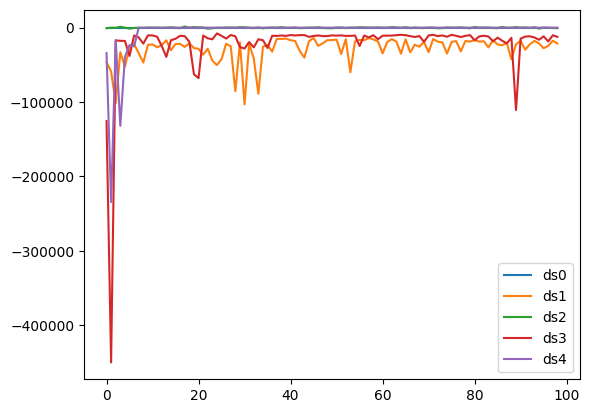

In [7]:
# d = np.load('./data/em-fits/datasetE_nonnormal/ds3-random.npz', allow_pickle=True)
# rand_elbos = d['elbos']
# d = np.load('./data/em-fits/datasetE_nonnormal/ds3-gaussian.npz', allow_pickle=True)
# gauss_elbos = d['elbos']

plt.figure()

for i in range(5):
    d = np.load('./data/em-fits/datasetE_nonnormal/ds%d-best-lds.npz' % i, allow_pickle=True)
    best_elbos = d['elbos']

    plt.plot(best_elbos[0, 1:], label='ds%d' % i)
# plt.plot(gauss_elbos[0, 1:], color='b', label='gaussian')
# plt.plot(rand_elbos[0, 1:], color='k', alpha=0.1, label='random')
# for i in range(1, 20):
#     plt.plot(rand_elbos[i, 1:], color='k', alpha=0.1)

plt.legend()
# plt.ylim(-0.5e6, 0)

In [24]:
from fit_EM import check_convergence

colors = np.array([[95,59,151],[85,180,103],[250,186,63],[150,150,150]])/255

dataset = 'datasetE_nonnormal'
tol = 0.01
min_steps = 2

random_inits = np.load('./data/em-fits/%s/ds3-random.npz' %dataset)
random_elbos, random_steps = check_convergence(random_inits,tol=tol,method='Gain',min_steps=min_steps)

bern_init = np.load('./data/em-fits/%s/ds3-best-lds.npz' %dataset)
bern_elbos, bern_steps = check_convergence(bern_init,tol=tol,method='Gain',min_steps=min_steps)

gauss_init = np.load('./data/em-fits/%s/ds3-gaussian.npz' %dataset)
gauss_elbos, gauss_steps = check_convergence(gauss_init,tol=tol,method='Gain',min_steps=min_steps)

initialization: 0, steps to convergence: 10, elbo diff: 8053
initialization: 1, steps to convergence: 12, elbo diff: 394950
initialization: 2, steps to convergence: 12, elbo diff: -2542
initialization: 3, steps to convergence: 16, elbo diff: 734
initialization: 4, steps to convergence: 12, elbo diff: -110640
initialization: 5, steps to convergence: 12, elbo diff: 78914
initialization: 6, steps to convergence: 8, elbo diff: 140699
initialization: 7, steps to convergence: 10, elbo diff: 19667
initialization: 8, steps to convergence: 12, elbo diff: 4940
initialization: 9, steps to convergence: 16, elbo diff: -5252
initialization: 10, steps to convergence: 14, elbo diff: -287130
initialization: 11, steps to convergence: 12, elbo diff: 758
initialization: 12, steps to convergence: 12, elbo diff: -8849
initialization: 13, steps to convergence: 60, elbo diff: N/A
initialization: 14, steps to convergence: 12, elbo diff: -17744
initialization: 15, steps to convergence: 16, elbo diff: 12884
init

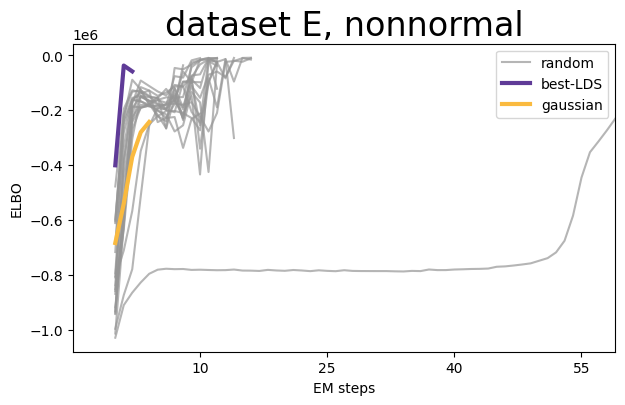

In [25]:
colors = np.array([[95,59,151],[85,180,103],[250,186,63],[150,150,150]])/255

plt.figure(figsize=(7,4))

for i in range(20):
    if i == 0:
        plt.plot(random_elbos[i,0:int(random_steps[i])+1],color=colors[3], alpha=0.7, label='random')
    else:
        plt.plot(random_elbos[i,0:int(random_steps[i])+1],color=colors[3], alpha=0.7)
    
plt.plot(bern_elbos[0,0:int(bern_steps)+1],color=colors[0], label='best-LDS', linewidth=3)
plt.plot(gauss_elbos[0,0:int(gauss_steps)+1],color=colors[2], label='gaussian', linewidth=3)

plt.xlim([-5,59])
plt.xticks(np.arange(10,60,15))
# plt.ylim([-500000,100000])
# plt.yticks(np.arange(-500000,100001,200000))
plt.xlabel('EM steps')
plt.ylabel('ELBO')
plt.title('dataset E, nonnormal', fontsize=24)
plt.legend()

# plt.savefig("saved_images/fig3_datasetC_large.pdf",transparent=True)